In [15]:
import configobj
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import Quandl
%matplotlib inline

In [16]:
config = configobj.ConfigObj('/home/todd/.authtoken_Quandl')
authtoken = config['authtoken']

In [17]:
SPY = Quandl.get("YAHOO/INDEX_SPY", authtoken=authtoken)  # Daily stock prices for SPY.
VIX = Quandl.get("CBOE/VIX", authtoken=authtoken)  # Daily stock prices for VIX.

In [18]:
VIX.columns = ['Open', 'High', 'Low', 'Close']  # Properly name the columns for this case.

In [19]:
len(SPY), len(VIX)  # Will need both arrays to be the same size.

(5841, 3087)

In [20]:
x = pd.merge(VIX, SPY, left_index=True, right_index=True, suffixes=('_VIX', '_SPY'))

In [21]:
predictor = x.Open_VIX - x.Close_VIX.shift(periods=1)  # Today's open - yesterday's close.

In [22]:
predictor.dropna(inplace=True)  # Drop NaNs from the shift operation. Will truncate array by 1 at start of array.

In [23]:
predictor = np.asarray(predictor)  # Make this a numpy array.

In [24]:
target = x.Close_SPY - x.Open_SPY  # Today's close - today's open.

In [25]:
target = np.asarray(target)[1:]  # Make this a numpy array, slice to match length of predictor (from start).

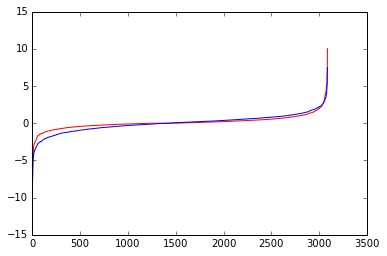

In [13]:
plt.plot(np.sort(predictor), 'r-', np.sort(target), 'b-'); plt.show()  # A quick look at the distributions.